In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

### C = 1, Default Regularization (L2)

In [10]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
logreg.score(X_train, y_train)

0.9577464788732394

In [12]:
logreg.score(X_test, y_test)

0.958041958041958

### C = 100, Best Possible Curve Fitting

In [13]:
logreg100 = LogisticRegression(C=100,solver='lbfgs', max_iter=10000)
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
logreg100.score(X_train, y_train)

0.9835680751173709

In [15]:
logreg100.score(X_test, y_test)

0.965034965034965

### C = 0.01, Worst Curve Fitting

In [22]:
logreg001 = LogisticRegression(C=0.001,solver='lbfgs', max_iter=10000)
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
logreg001.score(X_train, y_train)

0.9530516431924883

In [24]:
logreg001.score(X_test, y_test)

0.9440559440559441

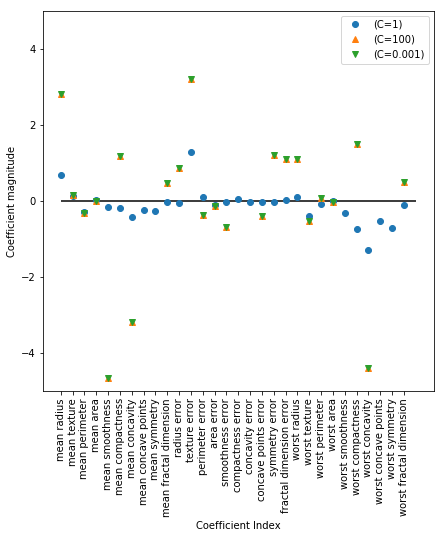

In [29]:
plt.figure(figsize = (7, 7))
plt.plot(logreg.coef_.T, 'o', label="(C=1)")
plt.plot(logreg100.coef_.T, '^', label="(C=100)")
plt.plot(logreg100.coef_.T, 'v', label="(C=0.001)")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient magnitude")
plt.legend()

C =  0.001  Accuracy =  0.9131455399061033
C =  0.001  Accuracy =  0.9230769230769231
C =  1  Accuracy =  0.960093896713615
C =  1  Accuracy =  0.958041958041958
C =  100  Accuracy =  0.9859154929577465
C =  100  Accuracy =  0.9790209790209791


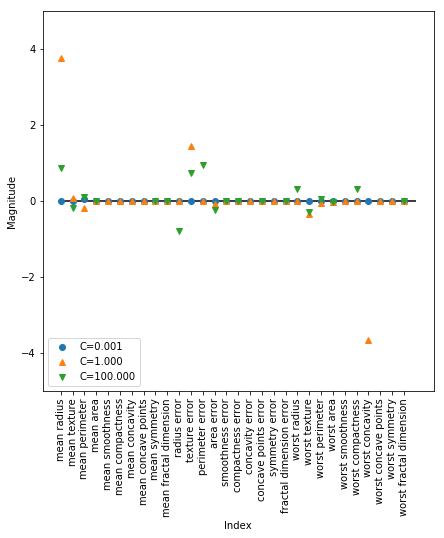

In [40]:
plt.figure(figsize = (7, 7))

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    l1 = LogisticRegression(C=C, solver='liblinear', max_iter=1000,  penalty="l1").fit(X_train,y_train)
    print("C = ", C, " Accuracy = ", l1.score(X_train, y_train))
    print("C = ", C,  " Accuracy = ", l1.score(X_test, y_test))
    plt.plot(l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Index")
plt.ylabel("Magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)